## Neste projeto, temos como objetivo:
* Demonstrar em forma gráfica a evolução de mortes e feridos por grupo perpetrador (selecionando os dez primeiros em ocorrência) ao longo das décadas de 1970 a 2020 na região da Caxemira.
* Demonstrar em forma gráfica a evolução dos alvos dos ataques terroristas, também selecionando os dez alvos com maior ocorrência.
* Visualizar graficamente a evolução dos tipos de ataque

#### Importando as bibliotecas

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Lendo o dataframe

In [92]:
# O dataframe original foi transformado em arquivo xlsx para poder modificar algumas datas incompatíveis com o pd.to_datetime
dados = pd.read_excel('Terrorismo na Caxemira 1970-2020.xlsx')
dados.head()

,CITY,DATE,PERPETRATOR GROUP,FATALITIES,INJURED,TARGET TYPE,ATTACK TYPE,WEAPON TYPE
0,Srinagar,2020-12-31,The Resistance Front (TRF),1,0,Business,Armed Assault,Firearms
1,Srinagar,2020-12-24,Unknown,0,0,Police,Bombing/Explosion,Explosives
2,Srinagar,2020-12-14,Unknown,1,0,Private Citizens & Property,Assassination,Firearms
3,Srinagar,2020-12-11,Unknown,0,0,Police,Bombing/Explosion,Explosives
4,Srinagar,2020-11-26,"Jaish-e-Mohammad (JeM),Lashkar-e-Taiba (LeT)",2,0,Military,Armed Assault,Firearms


In [93]:
dados.shape

(933, 8)

In [94]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CITY               933 non-null    object        
 1   DATE               933 non-null    datetime64[ns]
 2   PERPETRATOR GROUP  933 non-null    object        
 3   FATALITIES         933 non-null    object        
 4   INJURED            933 non-null    object        
 5   TARGET TYPE        933 non-null    object        
 6   ATTACK TYPE        933 non-null    object        
 7   WEAPON TYPE        933 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 58.4+ KB


In [95]:
# dados['PERPETRATOR GROUP'].unique()

#### Tratamento dos dados

In [96]:
# Removendo os dados não numéricos
dados_tratados = dados[pd.to_numeric(dados['FATALITIES'], errors='coerce').notnull()]
dados_tratados = dados_tratados[pd.to_numeric(dados_tratados['INJURED'], errors='coerce').notnull()]

In [97]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 932
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CITY               903 non-null    object        
 1   DATE               903 non-null    datetime64[ns]
 2   PERPETRATOR GROUP  903 non-null    object        
 3   FATALITIES         903 non-null    object        
 4   INJURED            903 non-null    object        
 5   TARGET TYPE        903 non-null    object        
 6   ATTACK TYPE        903 non-null    object        
 7   WEAPON TYPE        903 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 63.5+ KB


In [98]:
dados_tratados['DATE'].isna().any()


False

In [99]:
dados_tratados['FATALITIES'] = dados_tratados['FATALITIES'].astype(int)
dados_tratados['INJURED'] = dados_tratados['INJURED'].astype(int)

In [100]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 932
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CITY               903 non-null    object        
 1   DATE               903 non-null    datetime64[ns]
 2   PERPETRATOR GROUP  903 non-null    object        
 3   FATALITIES         903 non-null    int32         
 4   INJURED            903 non-null    int32         
 5   TARGET TYPE        903 non-null    object        
 6   ATTACK TYPE        903 non-null    object        
 7   WEAPON TYPE        903 non-null    object        
dtypes: datetime64[ns](1), int32(2), object(5)
memory usage: 56.4+ KB


In [101]:
dados_tratados['DECADE'] = (dados_tratados['DATE'].dt.year // 10) * 10
dados_tratados['COMBINED'] = dados_tratados['FATALITIES'] + dados_tratados['INJURED']
dados_tratados.head()

,CITY,DATE,PERPETRATOR GROUP,FATALITIES,INJURED,TARGET TYPE,ATTACK TYPE,WEAPON TYPE,DECADE,COMBINED
0,Srinagar,2020-12-31,The Resistance Front (TRF),1,0,Business,Armed Assault,Firearms,2020,1
1,Srinagar,2020-12-24,Unknown,0,0,Police,Bombing/Explosion,Explosives,2020,0
2,Srinagar,2020-12-14,Unknown,1,0,Private Citizens & Property,Assassination,Firearms,2020,1
3,Srinagar,2020-12-11,Unknown,0,0,Police,Bombing/Explosion,Explosives,2020,0
4,Srinagar,2020-11-26,"Jaish-e-Mohammad (JeM),Lashkar-e-Taiba (LeT)",2,0,Military,Armed Assault,Firearms,2020,2


In [102]:
suspected_group = 'Al-Mansoorian (suspected),Jamiat ul-Mujahedin (JuM) (suspected),Lashkar-e-Taiba (LeT) (suspected)'
dados_tratados['PERPETRATOR GROUP'] = dados_tratados['PERPETRATOR GROUP'].replace(suspected_group, 'Multiple Suspects')

#### Agrupando os grupos perpetradores por década

In [103]:
agrupamento_decada = dados_tratados.groupby(['DECADE', 'PERPETRATOR GROUP'])['COMBINED'].sum().reset_index()
agrupamento_decada.head()

,DECADE,PERPETRATOR GROUP,COMBINED
0,1980,Allah's Tigers,0
1,1980,Babbar Khalsa International (BKI),64
2,1980,Jammu and Kashmir Liberation Front,10
3,1980,Kashmiri extremists,7
4,1980,Muslim Militants,21


#### Checando a ordem dos grupos perpetradores com maior ocorrência ao longo das décadas

In [104]:
ordem = dados_tratados.groupby(['PERPETRATOR GROUP'])['COMBINED'].sum().sort_values(ascending = False)
ordem.head(10)

PERPETRATOR GROUP
Unknown                   2216
Hizbul Mujahideen (HM)     304
Lashkar-e-Taiba (LeT)      294
Kashmiri extremists        247
Muslim Militants           216
Jaish-e-Mohammad (JeM)     172
Muslim Separatists         138
Harkat ul Ansar             92
Multiple Suspects           79
Al-Mansoorian               79
Name: COMBINED, dtype: int32

#### Como os atentandos de autoria desconhecida (unknown) representam um valor muito maior do que os outros grupos, serão representados à parte e serão comparados com os outros grupos somados que não estão entre os 9 grupos perpetradores líderes em ocorrência

In [105]:
agrupamento_decada_filtro = agrupamento_decada[agrupamento_decada['PERPETRATOR GROUP'].isin(ordem.index[1:11])].reset_index(drop = True)
agrupamento_decada_filtro = agrupamento_decada_filtro.groupby(['DECADE', 'PERPETRATOR GROUP'])['COMBINED'].sum().reset_index()
agrupamento_decada_filtro

,DECADE,PERPETRATOR GROUP,COMBINED
0,1980,Kashmiri extremists,7
1,1980,Muslim Militants,21
2,1980,Muslim Separatists,11
3,1990,Harkat ul Ansar,92
4,1990,Hizbul Mujahideen (HM),48
5,1990,Kashmiri extremists,240
6,1990,Khalistan Zindabad (Long Live Khalistan),74
7,1990,Lashkar-e-Taiba (LeT),10
8,1990,Muslim Militants,195
9,1990,Muslim Separatists,127


#### Representação gráfica

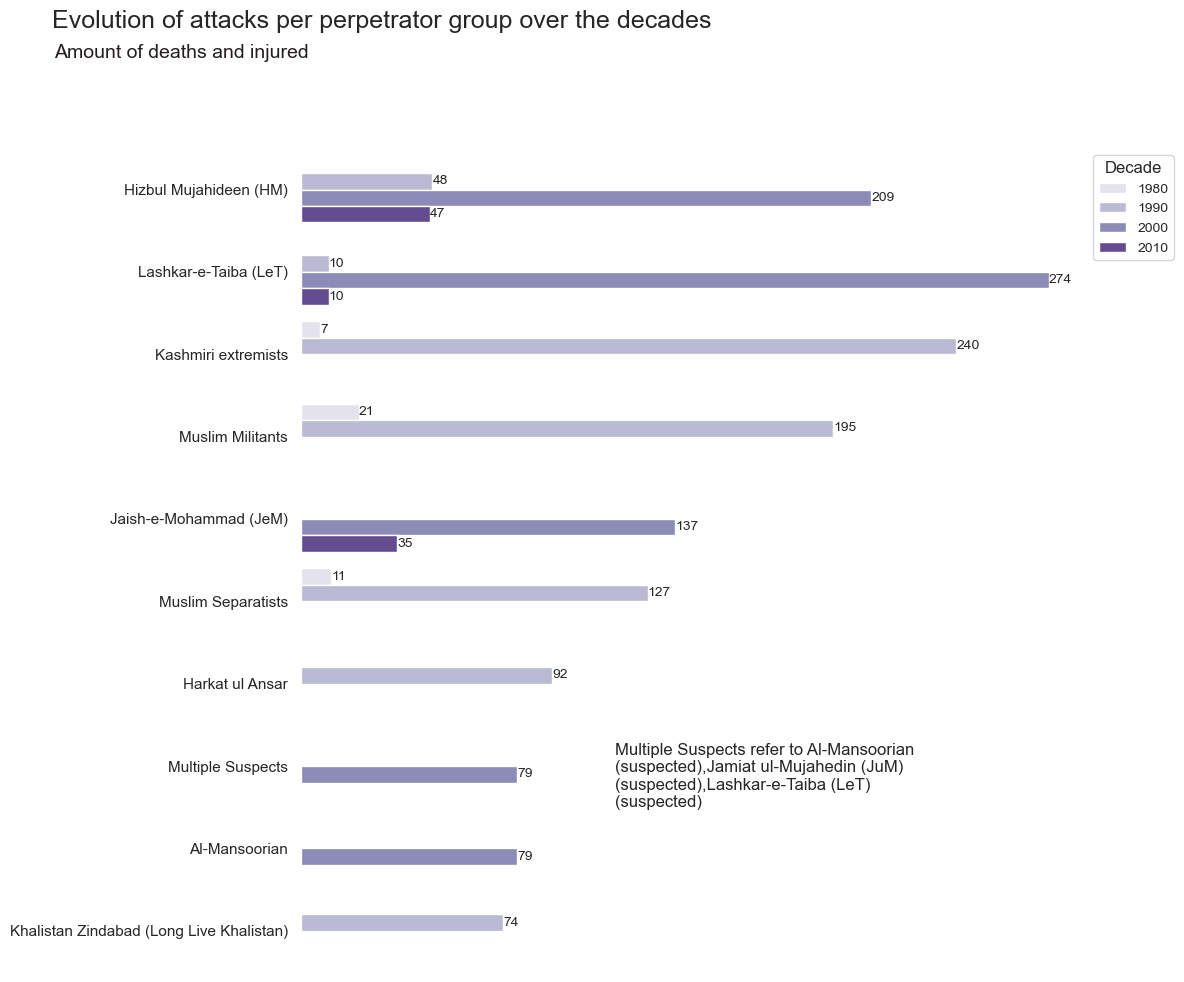

In [106]:
plt.figure(figsize=(12, 10))

palette = sns.color_palette("Purples", n_colors=len(agrupamento_decada_filtro['DECADE'].unique()))

sns.set_theme(style="white")

# Usar barplot para criar um gráfico de barras empilhadas
ax = sns.barplot(
    data = agrupamento_decada_filtro, y = "PERPETRATOR GROUP", x = "COMBINED",
    hue = "DECADE", palette = palette, order = ordem.index[1:11], width = 0.8
)

# Adicionar os valores numéricos dentro das barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Verificar se width é NaN
    if pd.isna(width):
        width = 0  # Substituir NaN por 0 para evitar erro

    # Adicionar o valor do número ao lado direito da barra, alinhado verticalmente com a altura da barra
    if width > 0:
        ax.text(x + width + 0.05, y + height / 2, f'{int(width)}', ha='left', va='center', fontsize = 10)
        
# Adicionar título
plt.suptitle('Evolution of attacks per perpetrator group over the decades', size = 18, ha='right', x = 0.6, y = 0.98)
plt.title('Amount of deaths and injured', fontsize = 14, color = '#231F20', ha = "right", x = 0.0098, y = 1.1)

ax.legend(title = 'Decade', bbox_to_anchor = (1, 1), bbox_transform = ax.transAxes, fontsize = 10, loc = 'upper left')

# Remover o rótulo do eixo y
ax.set_xlabel('')

ax.set_xticklabels([])

# Remover o rótulo do eixo y
ax.set_ylabel('')
            
ax.annotate('Multiple Suspects refer to Al-Mansoorian\n(suspected),Jamiat ul-Mujahedin (JuM)\n(suspected),Lashkar-e-Taiba (LeT)\n(suspected)',
            xy=(0.4, 0.2), xycoords='axes fraction',
            xytext=(0, 0), textcoords='offset points')            

# Ajustar layout
plt.tight_layout()

ax.set_frame_on(False)

plt.savefig('grafico1.png')

# Mostrar o gráfico
plt.show()





#### Agrupando os demais grupos perpetradores em uma categoria única denominada "Others"

In [107]:
outros = agrupamento_decada[agrupamento_decada['PERPETRATOR GROUP'].isin(ordem.index[11:])].reset_index(drop = True)
outros['PERPETRATOR GROUP'] = 'Others'
outros = outros.groupby(['DECADE', 'PERPETRATOR GROUP'])['COMBINED'].sum().reset_index()
outros

,DECADE,PERPETRATOR GROUP,COMBINED
0,1980,Others,91
1,1990,Others,256
2,2000,Others,588
3,2010,Others,191
4,2020,Others,18


#### Selecionando apenas os atentados de autoria desconhecida

In [108]:
desconhecido = agrupamento_decada[agrupamento_decada['PERPETRATOR GROUP'] == 'Unknown'].reset_index(drop = True)
desconhecido

,DECADE,PERPETRATOR GROUP,COMBINED
0,1980,Unknown,107
1,1990,Unknown,559
2,2000,Unknown,1349
3,2010,Unknown,187
4,2020,Unknown,14


#### Concatenando "Others" com "Unknown"

In [109]:
outros_desconhecido = pd.concat([outros, desconhecido], ignore_index = True)
outros_desconhecido

,DECADE,PERPETRATOR GROUP,COMBINED
0,1980,Others,91
1,1990,Others,256
2,2000,Others,588
3,2010,Others,191
4,2020,Others,18
5,1980,Unknown,107
6,1990,Unknown,559
7,2000,Unknown,1349
8,2010,Unknown,187
9,2020,Unknown,14


#### Representação gráfica

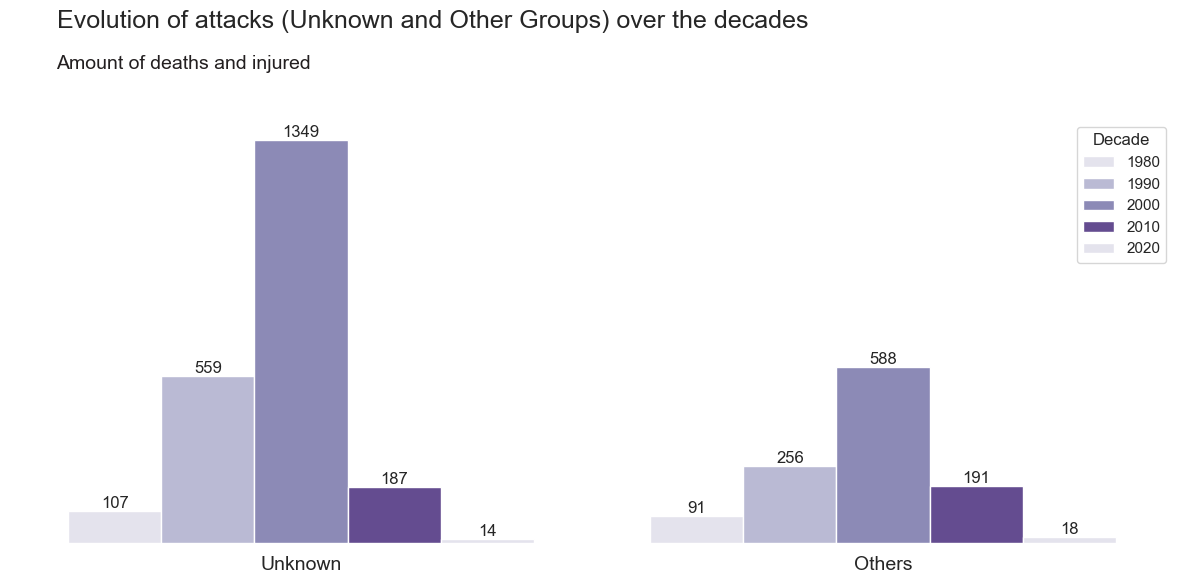

In [110]:
# Configurar o estilo do Seaborn para o fundo branco
sns.set_theme(style="white")

# Calcular a ordem dos "TARGET TYPE" pelo total
order = outros_desconhecido.groupby('PERPETRATOR GROUP')['COMBINED'].sum().sort_values(ascending=False).index

# Criar o gráfico de barras empilhadas com Seaborn
plt.figure(figsize=(12, 6))

# Usar barplot para criar um gráfico de barras empilhadas
ax = sns.barplot(
    data = outros_desconhecido, x = "PERPETRATOR GROUP", y = "COMBINED",
    hue = "DECADE", palette = palette, order=order
)

# # Adicionar título
plt.suptitle('Evolution of attacks (Unknown and Other Groups) over the decades', size = 18, ha='right', x = 0.68, y = 0.97)
plt.title('Amount of deaths and injured', fontsize = 14, color = '#231F20', ha = "right", x = 0.258, y = 1.1)

# Definir os rótulos do eixo x e rotacioná-los
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=14)  # Ajuste de fontsize

# Remover o rótulo do eixo x
ax.set_xlabel('')

ax.set_ylabel('')

ax.set_yticklabels([])

# Adicionar os valores numéricos dentro das barras, acima do topo
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # Evitar exibir números para barras vazias
        ax.annotate(f'{height:.0f}', (x + width / 2, y + height),
                    ha='center', va='bottom', xytext=(0, 0), textcoords='offset points', fontsize=12)  # Ajustes

# Ajustar layout
plt.tight_layout()

# Mudar o nome da legenda "DECADE" para "Decade"
ax.legend(title = 'Decade')

ax.set_frame_on(False)

plt.savefig('grafico2.png')

# Mostrar o gráfico
plt.show()




#### Novo tratamento de dados para selecionar os dados não nulos dos alvos dos ataques terroristas

In [111]:
dados_tratados2 = dados.copy()

In [112]:
dados_tratados2['DECADE'] = dados_tratados2['DATE'].dt.year // 10 * 10
dados_tratados2

,CITY,DATE,PERPETRATOR GROUP,FATALITIES,INJURED,TARGET TYPE,ATTACK TYPE,WEAPON TYPE,DECADE
0,Srinagar,2020-12-31,The Resistance Front (TRF),1,0,Business,Armed Assault,Firearms,2020
1,Srinagar,2020-12-24,Unknown,0,0,Police,Bombing/Explosion,Explosives,2020
2,Srinagar,2020-12-14,Unknown,1,0,Private Citizens & Property,Assassination,Firearms,2020
3,Srinagar,2020-12-11,Unknown,0,0,Police,Bombing/Explosion,Explosives,2020
4,Srinagar,2020-11-26,"Jaish-e-Mohammad (JeM),Lashkar-e-Taiba (LeT)",2,0,Military,Armed Assault,Firearms,2020
...,...,...,...,...,...,...,...,...,...
928,Mirgund,2015-07-31,Lashkar-e-Islam (India),0,3,Police,Armed Assault,Firearms,2010
929,Mattan,2018-06-07,Unknown,0,2,Police,Unarmed Assault,Melee,2010
930,Mattan,2018-03-26,Unknown,0,0,Violent Political Party,Armed Assault,Firearms,2010
931,Mattan,2017-10-03,Unknown,1,0,Government (General),Assassination,Firearms,2010


#### Contabilizando os alvos

In [113]:
alvo = dados_tratados2.groupby('DECADE')['TARGET TYPE'].value_counts()
alvo = alvo.rename('COUNT').reset_index()
alvo

,DECADE,TARGET TYPE,COUNT
0,1980,Private Citizens & Property,14
1,1980,Business,10
2,1980,Police,9
3,1980,Government (General),7
4,1980,Transportation,7
...,...,...,...
87,2020,"Police,Private Citizens & Property",3
88,2020,Religious Figures/Institutions,3
89,2020,Business,2
90,2020,Military,2


#### Checando a ordem de incidência

In [114]:
ordem = alvo.groupby(['TARGET TYPE'])['COUNT'].sum().sort_values(ascending = False)
ordem

TARGET TYPE
Police                                                            287
Government (General)                                              134
Private Citizens & Property                                       119
Military                                                           90
Business                                                           56
Transportation                                                     34
Police,Private Citizens & Property                                 32
Unknown                                                            30
Journalists & Media                                                22
Educational Institution                                            21
Religious Figures/Institutions                                     18
Tourists                                                           13
Military,Private Citizens & Property                               10
Violent Political Party                                             8
Police,P

#### Selecionado os nove primeiros alvos de maior incidência e agrupando

In [115]:
alvo_top_9 = alvo[alvo['TARGET TYPE'].isin(ordem.index[:9])].reset_index(drop = True)
alvo_top_9 = alvo_top_9.groupby(['DECADE', 'TARGET TYPE'])['COUNT'].sum().reset_index()
alvo_top_9.head()

,DECADE,TARGET TYPE,COUNT
0,1980,Business,10
1,1980,Government (General),7
2,1980,Police,9
3,1980,Private Citizens & Property,14
4,1980,Transportation,7


#### Agrupando os demais alvos como 'Others'

In [116]:
outros = alvo[alvo['TARGET TYPE'].isin(ordem.index[9:])].reset_index(drop = True)
outros['TARGET TYPE'] = 'Others'
outros = outros.groupby(['DECADE', 'TARGET TYPE'])[['COUNT']].sum().reset_index()
outros

,DECADE,TARGET TYPE,COUNT
0,1980,Others,7
1,1990,Others,37
2,2000,Others,45
3,2010,Others,37
4,2020,Others,3


#### Concatenando os dados

In [117]:
concatenacao = pd.concat([alvo_top_9, outros], ignore_index = True)

#### Representação gráfica

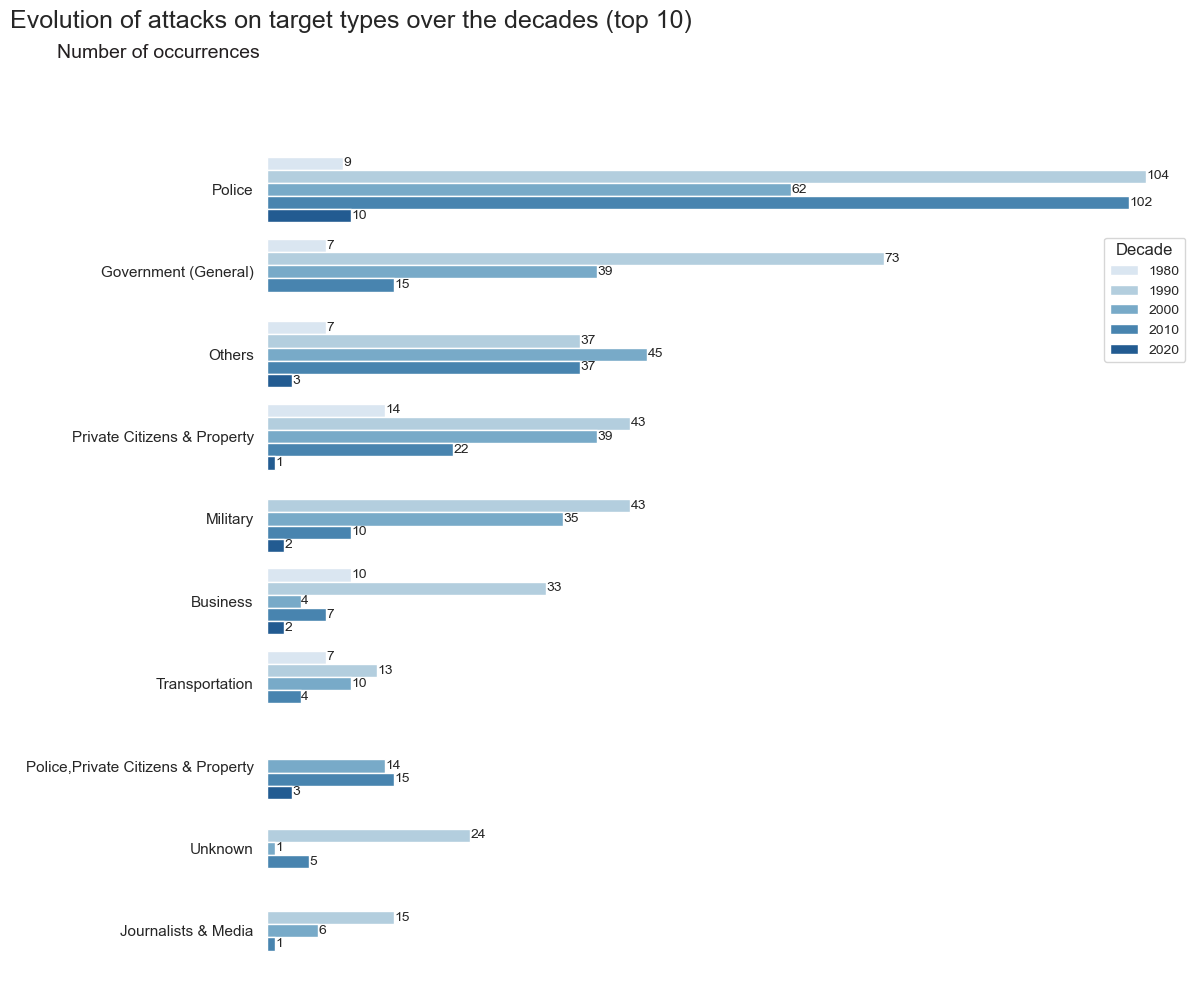

In [118]:
plt.figure(figsize=(12, 10))

palette = sns.color_palette("Blues", n_colors=len(concatenacao['DECADE'].unique()))

order = concatenacao.groupby('TARGET TYPE')['COUNT'].sum().sort_values(ascending=False).index

sns.set_theme(style="white")

# Usar barplot para criar um gráfico de barras empilhadas
ax = sns.barplot(
    data = concatenacao, y = "TARGET TYPE", x = "COUNT",
    hue = "DECADE", palette = palette, order = order, width = 0.8
)

# Adicionar os valores numéricos dentro das barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Verificar se width é NaN
    if pd.isna(width):
        width = 0  # Substituir NaN por 0 para evitar erro

    # Adicionar o valor do número ao lado direito da barra, alinhado verticalmente com a altura da barra
    if width > 0:
        ax.text(x + width + 0.05, y + height / 2, f'{int(width)}', ha='left', va='center', fontsize = 10)
        
# Adicionar título
plt.suptitle('Evolution of attacks on target types over the decades (top 10)', size = 18, ha='right', x = 0.57, y = 0.98)
plt.title('Number of occurrences', fontsize = 14, color = '#231F20', ha = "right", x = -0.008, y = 1.1)

ax.legend(title = 'Decade', bbox_to_anchor = (0.9, 0.9), bbox_transform = ax.transAxes, fontsize = 10, loc = 'upper left')

# Remover o rótulo do eixo y
ax.set_xlabel('')

ax.set_xticklabels([])

# Remover o rótulo do eixo y
ax.set_ylabel('')

# Ajustar layout
plt.tight_layout()

ax.set_frame_on(False)

plt.savefig('grafico3.png')

# Mostrar o gráfico
plt.show()





#### Contabilizando os tipos de ataques

In [119]:
tipo_ataque = dados_tratados2.groupby('DECADE')['ATTACK TYPE'].value_counts()
tipo_ataque = tipo_ataque.rename('COUNT').reset_index()
tipo_ataque

,DECADE,ATTACK TYPE,COUNT
0,1980,Bombing/Explosion,34
1,1980,Armed Assault,10
2,1980,Assassination,7
3,1980,Facility/Infrastructure Attack,1
4,1980,Hijacking,1
5,1980,Hostage Taking (Kidnapping),1
6,1990,Bombing/Explosion,192
7,1990,Assassination,71
8,1990,Armed Assault,57
9,1990,Hostage Taking (Kidnapping),35


#### Checando a ordem de incidência

In [120]:
ordem = tipo_ataque.groupby(['ATTACK TYPE'])['COUNT'].sum().sort_values(ascending = False)
ordem

ATTACK TYPE
Bombing/Explosion                                   480
Armed Assault                                       212
Assassination                                       111
Facility/Infrastructure Attack                       39
Hostage Taking (Kidnapping)                          37
Unarmed Assault                                      24
Bombing/Explosion,Armed Assault                       9
Armed Assault,Bombing/Explosion                       5
Bombing/Explosion,Facility/Infrastructure Attack      4
Unarmed Assault,Facility/Infrastructure Attack        3
Armed Assault,Facility/Infrastructure Attack          2
Hostage Taking (Kidnapping),Armed Assault             2
Unknown                                               2
Assassination,Armed Assault                           1
Bombing/Explosion,Bombing/Explosion                   1
Hijacking                                             1
Name: COUNT, dtype: int64

#### Selecionado os nove primeiros tipos de ataque de maior incidência e agrupando

In [121]:
ataque_top_9 = tipo_ataque[tipo_ataque['ATTACK TYPE'].isin(ordem.index[:9])].reset_index(drop = True)
ataque_top_9 = ataque_top_9.groupby(['DECADE', 'ATTACK TYPE'])['COUNT'].sum().reset_index()
ataque_top_9.head()

,DECADE,ATTACK TYPE,COUNT
0,1980,Armed Assault,10
1,1980,Assassination,7
2,1980,Bombing/Explosion,34
3,1980,Facility/Infrastructure Attack,1
4,1980,Hostage Taking (Kidnapping),1


#### Agrupando os demais tipos de ataque como 'Others'

In [122]:
outros = tipo_ataque[tipo_ataque['ATTACK TYPE'].isin(ordem.index[9:])].reset_index(drop = True)
outros['ATTACK TYPE'] = 'Others'
outros = outros.groupby(['DECADE', 'ATTACK TYPE'])[['COUNT']].sum().reset_index()
outros

,DECADE,ATTACK TYPE,COUNT
0,1980,Others,1
1,2000,Others,5
2,2010,Others,5
3,2020,Others,1


#### Concatenando os dados

In [123]:
concatenacao = pd.concat([ataque_top_9, outros], ignore_index = True)

#### Representação gráfica

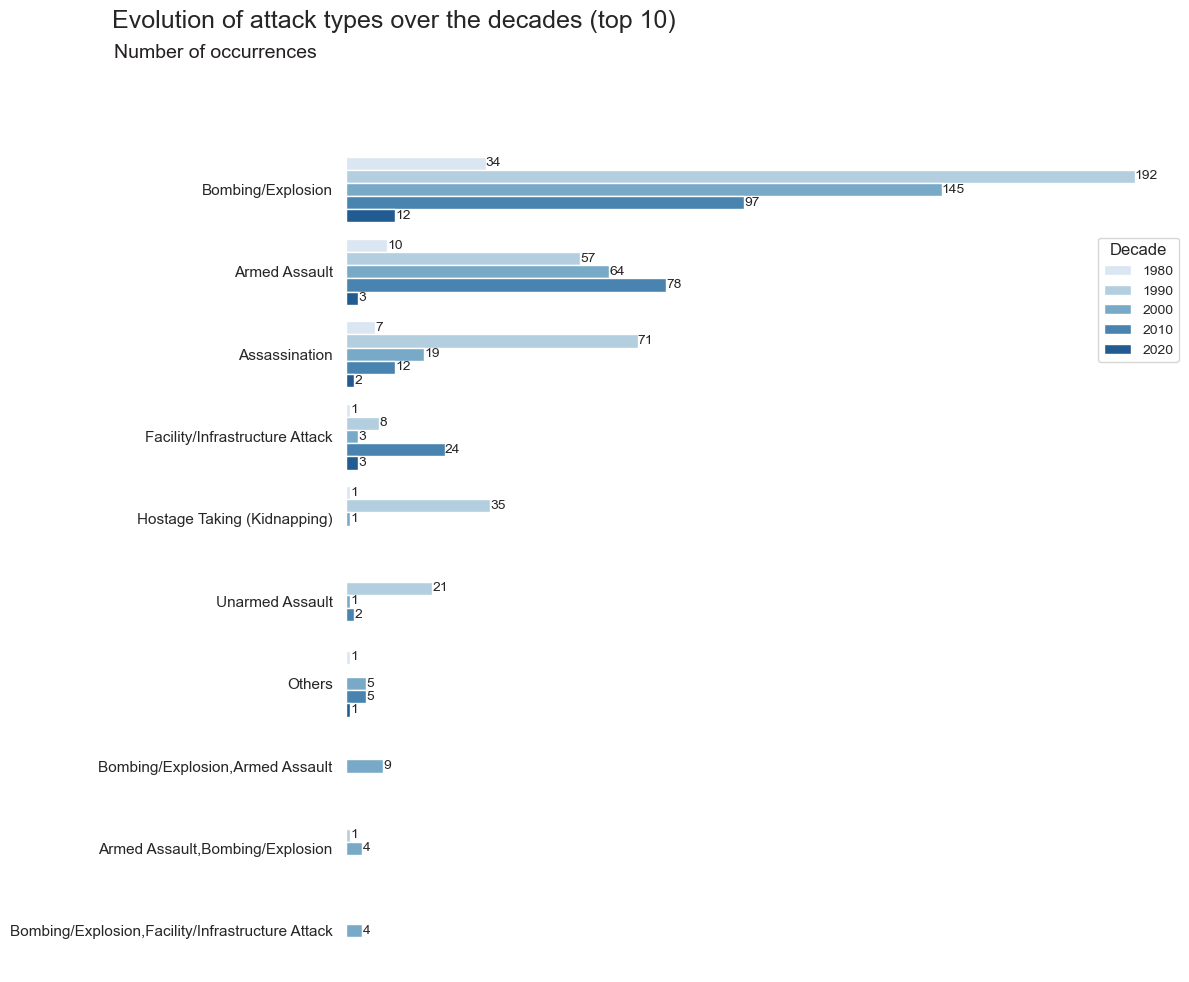

In [133]:
plt.figure(figsize=(12, 10))

palette = sns.color_palette("Blues", n_colors=len(concatenacao['DECADE'].unique()))

order = concatenacao.groupby('ATTACK TYPE')['COUNT'].sum().sort_values(ascending=False).index

sns.set_theme(style="white")

# Usar barplot para criar um gráfico de barras empilhadas
ax = sns.barplot(
    data = concatenacao, y = "ATTACK TYPE", x = "COUNT",
    hue = "DECADE", palette = palette, order = order, width = 0.8
)

# Adicionar os valores numéricos dentro das barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Verificar se width é NaN
    if pd.isna(width):
        width = 0  # Substituir NaN por 0 para evitar erro

    # Adicionar o valor do número ao lado direito da barra, alinhado verticalmente com a altura da barra
    if width > 0:
        ax.text(x + width + 0.05, y + height / 2, f'{int(width)}', ha='left', va='center', fontsize = 10)
        
# Adicionar título
plt.suptitle('Evolution of attack types over the decades (top 10)', size = 18, ha='right', x = 0.57, y = 0.98)
plt.title('Number of occurrences', fontsize = 14, color = '#231F20', ha = "right", x = -0.035, y = 1.1)

ax.legend(title = 'Decade', bbox_to_anchor = (0.9, 0.9), bbox_transform = ax.transAxes, fontsize = 10, loc = 'upper left')

# Remover o rótulo do eixo y
ax.set_xlabel('')

ax.set_xticklabels([])

# Remover o rótulo do eixo y
ax.set_ylabel('')

# Ajustar layout
plt.tight_layout()

ax.set_frame_on(False)

plt.savefig('grafico4.png')

# Mostrar o gráfico
plt.show()



